In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cust_churn = pd.read_csv("customer_churn.csv")
cust_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
cust_churn.shape

(7043, 21)

In [4]:
cust_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
cust_churn.drop(['customerID'], axis = 1,inplace = True)

In [7]:
cust_churn['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [8]:
cust_churn['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [9]:
cust_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

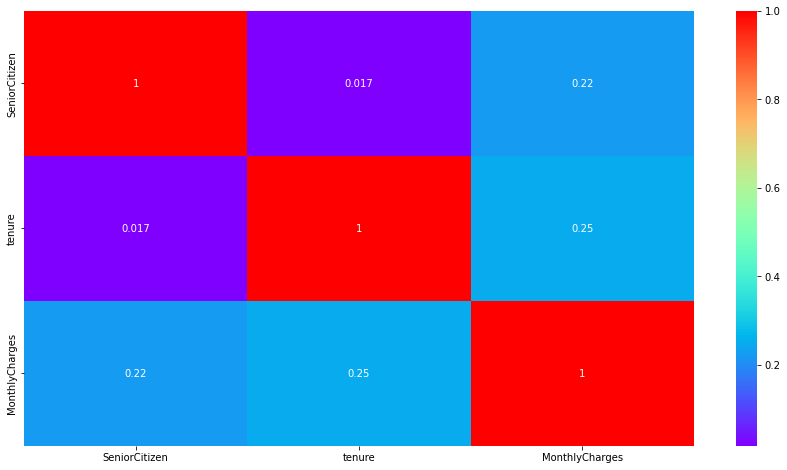

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(cust_churn.corr(), annot=True, cmap='rainbow')
plt.show()

In [11]:
customer_5 = cust_churn.iloc[:, 4]
print(customer_5)

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64


In [12]:
customer_15 = cust_churn.iloc[:, 14]
print(customer_15)

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object


In [13]:
senior_male_electronic = cust_churn[(cust_churn['gender'] == 'Male') & (cust_churn['PaymentMethod'] == 'Electronic check')]
senior_male_electronic = pd.DataFrame(senior_male_electronic)
senior_male_electronic

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
14,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
20,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
26,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes
27,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes
36,Male,0,No,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7014,Male,0,No,No,41,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,3645.75,No
7020,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes
7022,Male,0,No,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.3,No


In [14]:
customer_total_tenure = cust_churn[(cust_churn['tenure'] > 70) | (cust_churn['MonthlyCharges'] > 100)]
customer_total_tenure = pd.DataFrame(customer_total_tenure)
customer_total_tenure

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [15]:
cust_churn['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [16]:
two_mail_yes = cust_churn[(cust_churn['Contract'] == 'Two year') & (cust_churn['PaymentMethod'] == 'Mailed check') & 
                          (cust_churn['Churn'] == 'Yes')]
two_mail_yes = pd.DataFrame(two_mail_yes)
two_mail_yes

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,Male,0,No,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,Female,0,No,Yes,48,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [17]:
customer_333 = cust_churn.sample(n=333, random_state=42)
customer_333

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,Male,0,No,No,18,Yes,Yes,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,69.50,1199.4,No
3601,Female,0,Yes,Yes,55,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.00,1087.25,No
2149,Female,0,No,No,46,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,101.10,4674.4,No
5141,Male,0,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.25,86.05,No


In [18]:
cust_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

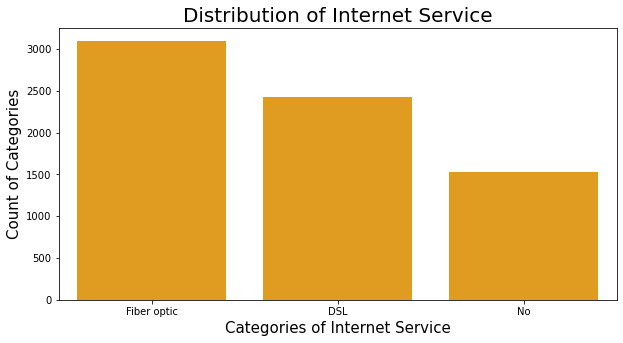

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x=cust_churn['InternetService'].value_counts().index,
            y=cust_churn['InternetService'].value_counts(), color='orange')
plt.xlabel('Categories of Internet Service', fontsize = 15)
plt.ylabel('Count of Categories', fontsize = 15)
plt.title('Distribution of Internet Service',fontsize = 20)
plt.show()

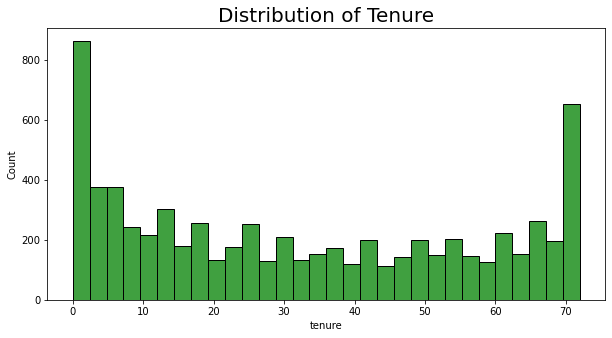

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(x=cust_churn['tenure'], bins = 30, color='green')
plt.title('Distribution of Tenure', fontsize = 20)
plt.show()

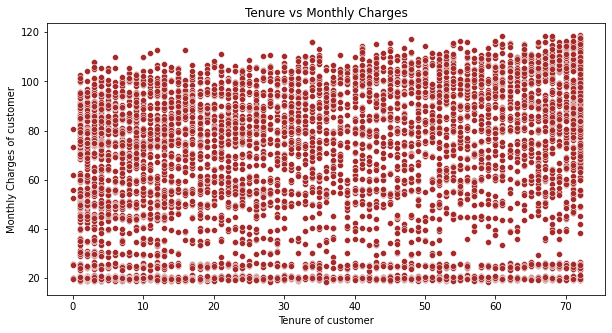

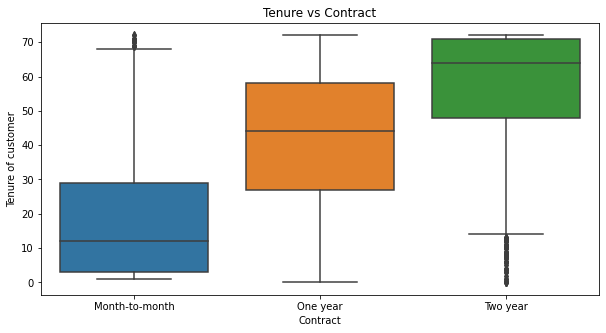

In [21]:
# Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='tenure', y='MonthlyCharges', data=cust_churn, color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

# Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Contract', y='tenure', data=cust_churn)
plt.xlabel('Contract')
plt.ylabel('Tenure of customer')
plt.title('Tenure vs Contract')
plt.show()

In [22]:
cust_churn['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
partner_encoded = le.fit_transform(cust_churn['Partner'])
cust_churn['Partner'] = partner_encoded

In [25]:
g_encoded = le.fit_transform(cust_churn['gender'])
cust_churn['gender'] = g_encoded

ds_encoded = le.fit_transform(cust_churn['Dependents'])
cust_churn['Dependents'] = ds_encoded

ps_encoded = le.fit_transform(cust_churn['PhoneService'])
cust_churn['PhoneService'] = ps_encoded

ml_encoded = le.fit_transform(cust_churn['MultipleLines'])
cust_churn['MultipleLines'] = ml_encoded

is_encoded = le.fit_transform(cust_churn['InternetService'])
cust_churn['InternetService'] = is_encoded

ons_encoded = le.fit_transform(cust_churn['OnlineSecurity'])
cust_churn['OnlineSecurity'] = ons_encoded

dp_encoded = le.fit_transform(cust_churn['DeviceProtection'])
cust_churn['DeviceProtection'] = dp_encoded

ob_encoded = le.fit_transform(cust_churn['OnlineBackup'])
cust_churn['OnlineBackup'] = ons_encoded

ts_encoded = le.fit_transform(cust_churn['TechSupport'])
cust_churn['TechSupport'] = ts_encoded

st_encoded = le.fit_transform(cust_churn['StreamingTV'])
cust_churn['StreamingTV'] = st_encoded

sm_encoded = le.fit_transform(cust_churn['StreamingMovies'])
cust_churn['StreamingMovies'] = sm_encoded

c_encoded = le.fit_transform(cust_churn['Contract'])
cust_churn['Contract'] = c_encoded

pb_encoded = le.fit_transform(cust_churn['PaperlessBilling'])
cust_churn['PaperlessBilling'] = pb_encoded

pm_encoded = le.fit_transform(cust_churn['PaymentMethod'])
cust_churn['PaymentMethod'] = pm_encoded

churn_encoded = le.fit_transform(cust_churn['Churn'])
cust_churn['Churn'] = churn_encoded

In [26]:
cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [27]:
cust_churn['TotalCharges'] = pd.to_numeric(cust_churn['TotalCharges'], errors='coerce')

In [28]:
cust_churn['TotalCharges'].isnull().sum()

11

In [29]:
mean_value = cust_churn['TotalCharges'].mean()
cust_churn['TotalCharges'] = cust_churn['TotalCharges'].fillna(mean_value).astype(float)

In [30]:
X, y = cust_churn['tenure'], cust_churn['MonthlyCharges']

In [31]:
X = np.array(X).reshape(-1, 1)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred1 = lin_reg.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error 

In [36]:
mse = mean_squared_error(y_test, y_pred1)
mse

845.6091871095867

In [37]:
rmse = np.sqrt(mse)
rmse

29.07936015646814

In [38]:
error = y_test - y_pred1
error = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred1, 'Error' : error})
error

,Actual,Predicted,Error
185,24.80,55.106590,-30.306590
2715,25.25,67.435209,-42.185209
3825,19.35,70.825579,-51.475579
1807,76.35,55.106590,21.243410
132,50.55,75.448812,-24.898812
...,...,...,...
5522,70.15,55.106590,15.043410
6377,44.65,55.106590,-10.456590
5500,60.50,73.291303,-12.791303
2392,90.70,60.962684,29.737316


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [40]:
X,y = cust_churn['MonthlyCharges'], cust_churn['Churn']

In [41]:
X = np.array(X).reshape(-1, 1)

In [42]:
X_test, X_train, y_test, y_train = train_test_split(X , y , train_size=0.65, random_state=42)

In [43]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred2 = log_reg.predict(X_test)

In [44]:
conf_mat1 = confusion_matrix(y_test, y_pred2)
conf_mat1

array([[3377,    0],
       [1200,    0]], dtype=int64)

In [45]:
acc_sc1 = accuracy_score(y_test, y_pred2)
acc_sc1

0.7378195324448329

In [46]:
X,y = cust_churn[['MonthlyCharges', 'tenure']], cust_churn['Churn']

In [47]:
X_test, X_train, y_test, y_train = train_test_split(X , y , train_size=0.8, random_state=42)

In [48]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred3 = log_reg.predict(X_test)

In [49]:
conf_mat2 = confusion_matrix(y_test, y_pred3)
conf_mat2

array([[3719,  419],
       [ 826,  670]], dtype=int64)

In [50]:
acc_sc2 = accuracy_score(y_test, y_pred3)
acc_sc2

0.7790202342917998

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
X,y = cust_churn[['tenure']], cust_churn['Churn']

In [53]:
X = np.array(X).reshape(-1, 1)

In [54]:
X_test, X_train, y_test, y_train = train_test_split(X , y , train_size=0.8, random_state=42)

In [55]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred4 = dt.predict(X_test)

In [56]:
conf_mat3 = confusion_matrix(y_test, y_pred4)
conf_mat3

array([[3855,  283],
       [1167,  329]], dtype=int64)

In [57]:
acc_sc3 = accuracy_score(y_test, y_pred4)
acc_sc3

0.7426340078097267

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
X,y = cust_churn[['tenure', 'MonthlyCharges']], cust_churn['Churn']

In [60]:
X_test, X_train, y_test, y_train = train_test_split(X , y , train_size=0.7, random_state=42)

In [61]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred5 = rf.predict(X_test)

In [62]:
conf_mat4 = confusion_matrix(y_test, y_pred5)
conf_mat4

array([[3150,  485],
       [ 694,  601]], dtype=int64)

In [63]:
acc_sc4 = accuracy_score(y_test, y_pred5)
acc_sc4

0.7608519269776877